In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fire = pd.read_csv("../data/forestfires.csv")

In [3]:
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
fire.shape

(517, 13)

In [5]:
fire.drop(columns=["X","Y"],inplace=True)

In [6]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [24]:
fire['fire'] = fire['area'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
fire = fire.drop(columns =["area"])

<function matplotlib.pyplot.show(close=None, block=None)>

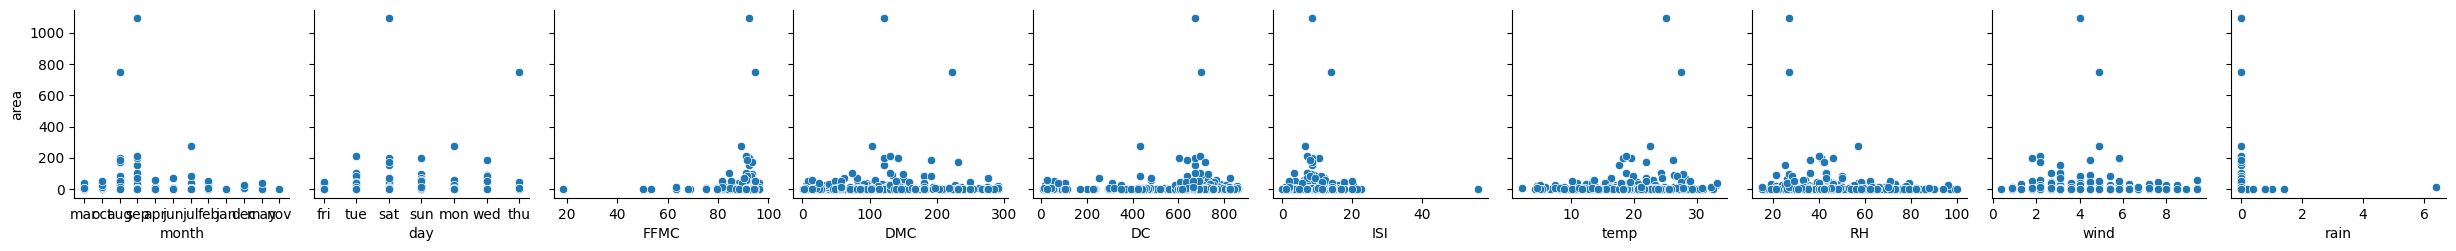

In [12]:
#FFMC : Fine fuel Moisture Code (easy ingnition if high)
#DMC : Duff Moisture code (persisten burning)
#DC : Drought code (long burning fires)
#ISI : Initial Spread Index (rapid spread if high)
import seaborn as sns

sns.pairplot(fire, y_vars=['area'], x_vars=fire.columns[:-1], kind='scatter');
plt.show

In [33]:
heatmap_df = fire.drop(columns = ["month", "day"])

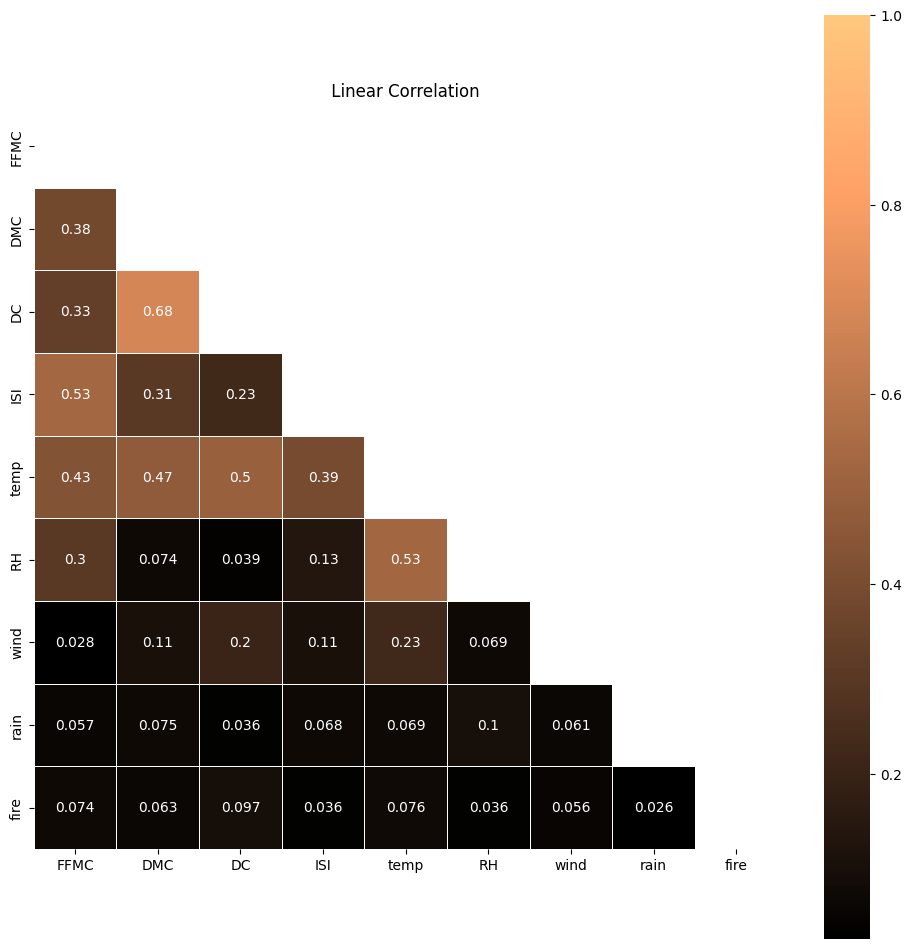

In [34]:
corr=np.abs(heatmap_df.corr(method='pearson')) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cmap="copper",annot = corr)
plt.title(" Linear Correlation ")
plt.show()

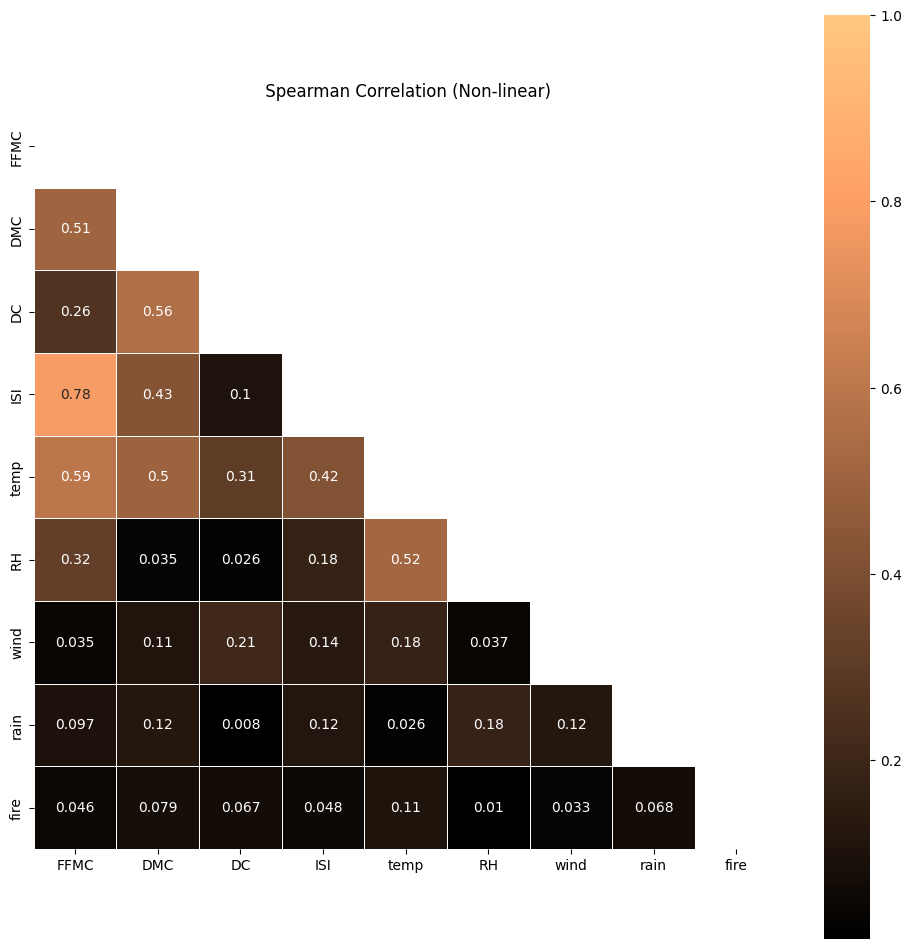

In [35]:
corr=np.abs(heatmap_df.corr(method = "spearman")) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cmap="copper",annot = corr)
plt.title(" Spearman Correlation (Non-linear)")
plt.show()

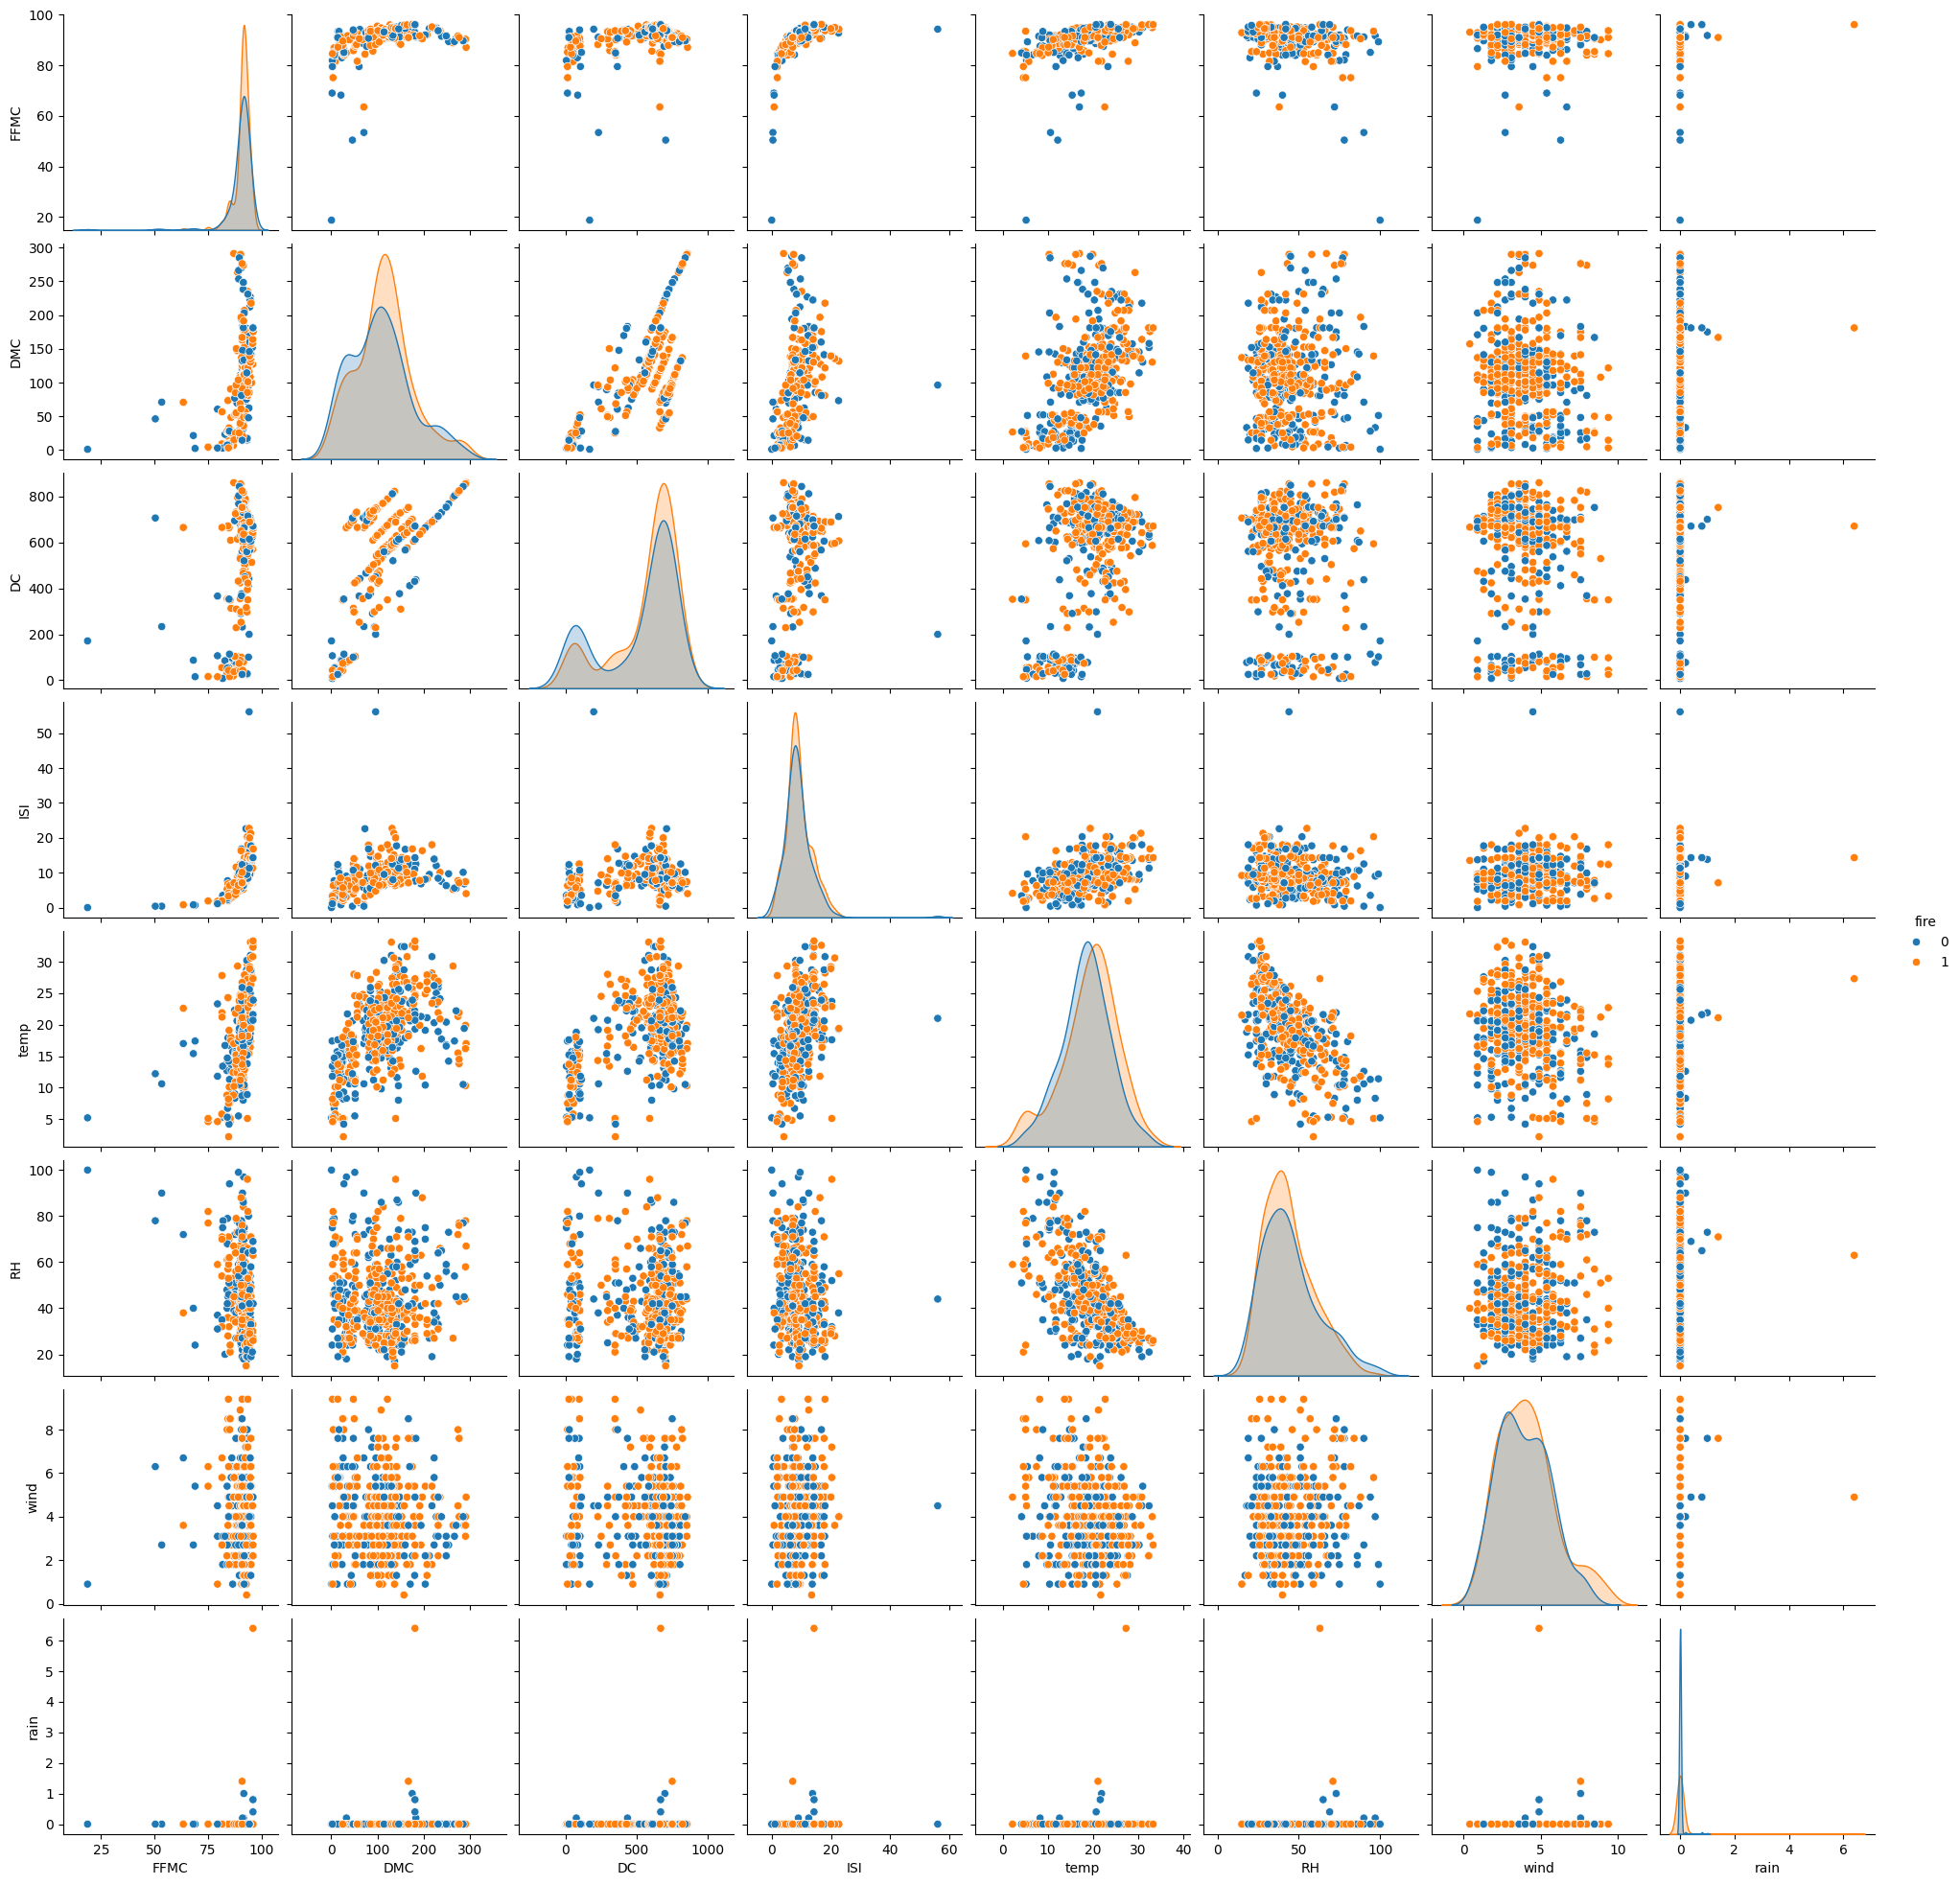

In [51]:
sns.pairplot(fire, hue="fire")
plt.show()

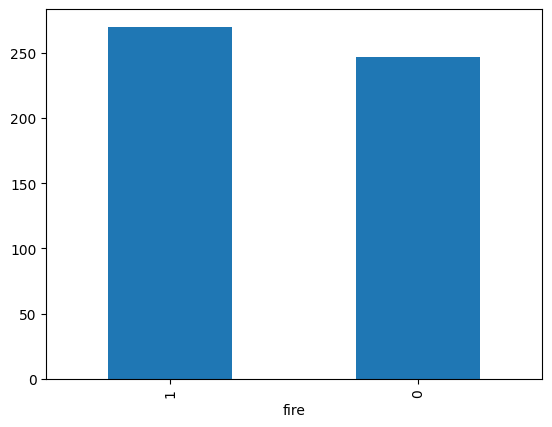

In [54]:
#No imbalenced
fires = fire["fire"].value_counts()
fires.plot(kind="bar")
plt.show()

In [40]:
test = fire.drop(columns =["month" , "day"])
test.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [44]:
#Define features and target ? Try then to classify area by category if continuous number is not 
features = test.drop(columns=["fire"])
target = test["fire"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")

The accuracy of the model is  50.96%


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")

The accuracy of the model is  53.85%


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=11) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")

The accuracy of the model is  59.62%


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")

The accuracy of the model is  52.88%


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=17) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")

The accuracy of the model is  50.00%


In [76]:
#with the K with the most accuracy, I evaluate the one with Recall and F1 by binary (because 0/1 for the target)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred,average = "binary") *100: .2f}%")

The accuracy of the model is  60.58%
The Recall for True fires is  55.00%
The F1 is  61.68%
The Precision is  70.21%


In [79]:
#tried macro to check
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred,average = "macro") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred,average = "macro") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred,average = "macro") *100: .2f}%")

The accuracy of the model is  60.58%
The Recall for True fires is  61.59%
The F1 is  60.54%
The Precision is  61.42%


In [113]:
#tried weighted to check
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"The accuracy of the model is {knn.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred,average = "weighted") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred,average = "weighted") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred,average = "weighted") *100: .2f}%")

The accuracy of the model is  60.58%
The Recall for True fires is  60.58%
The F1 is  60.72%
The Precision is  62.77%


In [111]:
#Logistic regression
#max_iter = 100
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=100,random_state=0)
logreg.fit(X_train_norm,y_train)
y_pred = logreg.predict(X_test_norm)
print(f"The accuracy of the model is {logreg.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred,average = "binary") *100: .2f}%")

The accuracy of the model is  60.58%
The Recall for True fires is  78.33%
The F1 is  69.63%
The Precision is  62.67%


In [90]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier (max_depth = 10, random_state = 0)
tree.fit(X_train_norm, y_train)
y_pred = tree.predict(X_test_norm)
print(f"The accuracy of the model is {tree.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred,average = "binary") *100: .2f}%")

The accuracy of the model is  56.73%
The Recall for True fires is  58.33%
The F1 is  60.87%
The Precision is  63.64%


In [92]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

{'FFMC': np.float64(0.0903794192633555),
 'DMC': np.float64(0.10161808335037571),
 'DC': np.float64(0.13095087396674304),
 'ISI': np.float64(0.07044959763073239),
 'temp': np.float64(0.22950127090486028),
 'RH': np.float64(0.22743208407803148),
 'wind': np.float64(0.14966867080590146),
 'rain': np.float64(0.0)}

In [103]:
#Logistic reg + bagging 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
bagging_reg = BaggingClassifier(LogisticRegression(max_iter=100),
                               n_estimators=100, # number of models to use
                               max_samples = 100,random_state = 0)
bagging_reg.fit(X_train_norm, y_train)
y_pred_test_bag = bagging_reg.predict(X_test_norm)
print(f"The accuracy of the model is {bagging_reg.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred_test_bag,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred_test_bag,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred_test_bag,average = "binary") *100: .2f}%")

The accuracy of the model is  65.38%
The Recall for True fires is  91.67%
The F1 is  75.34%
The Precision is  63.95%


In [107]:
#AdaBoost Logistic regression
ada_reg = AdaBoostClassifier(LogisticRegression(max_iter=100),n_estimators=100, random_state=0)
ada_reg.fit(X_train_norm, y_train)
y_pred_test_ada = ada_reg.predict(X_test_norm)
print(f"The accuracy of the model is {ada_reg.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred_test_ada,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred_test_ada,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred_test_ada,average = "binary") *100: .2f}%")

The accuracy of the model is  59.62%
The Recall for True fires is  75.00%
The F1 is  68.18%
The Precision is  62.50%


In [117]:
#Gradient Boost
grad_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
grad_reg.fit(X_train_norm, y_train)
y_pred_test_grad = grad_reg.predict(X_test_norm)
print(f"The accuracy of the model is {grad_reg.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred_test_grad,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred_test_grad,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred_test_grad,average = "binary") *100: .2f}%")

The accuracy of the model is  57.69%
The Recall for True fires is  66.67%
The F1 is  64.52%
The Precision is  62.50%


In [115]:
#AdaBoost Logistic regression + bagging
ada_bag_reg = AdaBoostClassifier(bagging_reg,n_estimators=100, random_state=0)
ada_bag_reg.fit(X_train_norm, y_train)
y_pred_test_ada_bag = ada_bag_reg.predict(X_test_norm)
print(f"The accuracy of the model is {ada_bag_reg.score(X_test_norm, y_test) *100: .2f}%")
print(f"The Recall for True fires is {recall_score(y_test, y_pred_test_ada_bag,average = "binary") *100: .2f}%")
print(f"The F1 is {f1_score(y_test, y_pred_test_ada_bag,average = "binary") *100: .2f}%")
print(f"The Precision is {precision_score(y_test, y_pred_test_ada_bag,average = "binary") *100: .2f}%")

The accuracy of the model is  57.69%
The Recall for True fires is  100.00%
The F1 is  73.17%
The Precision is  57.69%
